In [3839]:
#Importing all required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3840]:
#Reading the data file
vehicles=pd.read_csv('vehicle.csv')

In [3841]:
vehicles.head(10)
#From below data, we can see that most of the values are numeric. We do have NAN values present in the data set
#Let's analyze it further

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


In [3842]:
#Data pre-processing – Perform all the necessary pre-processing on the data ready to be fed to an Unsupervised algorithm 

In [3843]:
vehicles.info()
#The data set has 846 rows and 19 columns, all are numeric except column 'class' which is of type object. 
#This indicates that there is categorical variable which needs to represented in numeric format.
#From below data it is evident that not all 846 rows has values, some cells are empty 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [3844]:
vehicles.describe().transpose()
#Inference: From below data we can conclude that no negetive values are present.

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [3845]:
# Checking the presence of missing values.
vehicles.isnull().values.any(),vehicles.isna().values.any(),vehicles.isna().sum()
# Below data indicates that there are null and NAN values. 
#Inference:null values are present under columns-circularity,distance_circularity,radius_ratio,ps_axis_aspect_ratio,
#scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,
#scaled_radius_of_gyration_1,skewness_about,skewness_about.1,skewness_about.2

(True, True, compactness                    0
 circularity                    5
 distance_circularity           4
 radius_ratio                   6
 pr.axis_aspect_ratio           2
 max.length_aspect_ratio        0
 scatter_ratio                  1
 elongatedness                  1
 pr.axis_rectangularity         3
 max.length_rectangularity      0
 scaled_variance                3
 scaled_variance.1              2
 scaled_radius_of_gyration      2
 scaled_radius_of_gyration.1    4
 skewness_about                 6
 skewness_about.1               1
 skewness_about.2               1
 hollows_ratio                  0
 class                          0
 dtype: int64)

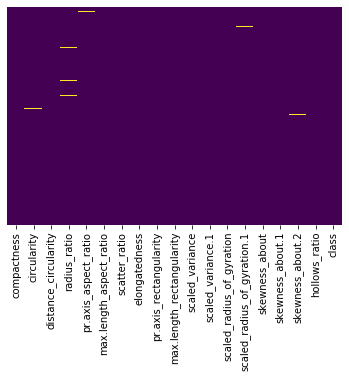

In [3846]:
#Let's reconfirm the understanding with heatmap
sns.heatmap(vehicles.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#From below graph, it is evident that values are missing (indicated by yellow bar)

In [3847]:
#Taking variables one bye one and proceeding with required data treatments in below steps.
# Also we will perform univariate/bivariate (independent variable/dependent variable) analysis to understand the 
#each attributes and choose carefully which all attributes have to be a part of the analysis and why

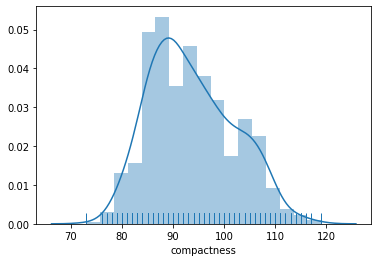

In [3848]:
#Analyzing the variable-compactness
sns.distplot(vehicles['compactness'], rug=True)
#Inference: Variable 'compactness' has slight right skewed distribution in the given data set. 
#No outliers are found and data is concentrated between 75-112

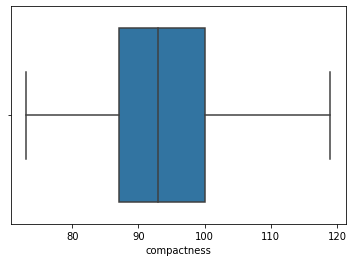

In [3849]:
sns.boxplot(vehicles['compactness'])
#No outliers, null/NAN values present w.r.t compactness and it looks clean

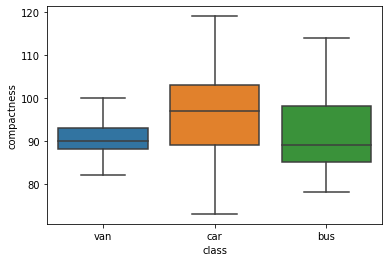

In [3850]:
#Bivariate Analysis-compactness vs class
sns.boxplot(vehicles['class'],vehicles['compactness'])
#Inference: From below graph, it is evident that comapctness varies for each class. 
#Also van and bus has slightly right skewed distribution w.r.t compactness. Car has wide spread w.r.t compactness


In [3851]:
#Analyzing the variable-circularity
#From the previous analysis, we could see the presence of null/NAN values in circularity
#Let's replace null values and NAN values, else we will not be able to visualize this numeric variables

In [3852]:
vehicles['circularity'].unique()
#Inference, we could see presence of nan values.  Before replacing the 'nan' values
#Let's check if 'circularity' variable has any outliers as this will impact the replacement value of nan

array([48., 41., 50., 44., nan, 43., 34., 36., 46., 42., 49., 55., 54.,
       56., 47., 37., 39., 53., 45., 38., 35., 40., 59., 52., 51., 58.,
       57., 33.])

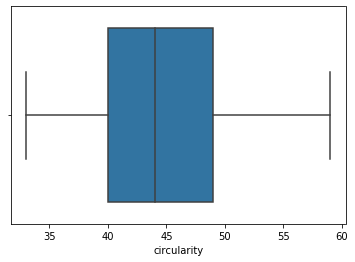

In [3853]:
sns.boxplot(vehicles['circularity'])
#Boxplot does not show the presence of outliers for circularity
#So we can replace 'nan' with median.

In [3854]:
vehicles['circularity'].fillna((vehicles['circularity'].median()), inplace=True)

In [3855]:
vehicles['circularity'].unique()
#Inference: nan is replaced with median and hence 'nan' it is not displayed as one of the unique value

array([48., 41., 50., 44., 43., 34., 36., 46., 42., 49., 55., 54., 56.,
       47., 37., 39., 53., 45., 38., 35., 40., 59., 52., 51., 58., 57.,
       33.])

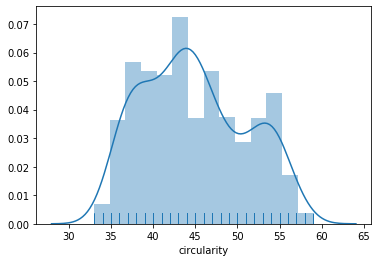

In [3856]:
sns.distplot(vehicles['circularity'], rug=True)
#Inference: Variable circularity is somewhat symmetrically distributed 
#We could also see multiple modes for this variable across data set

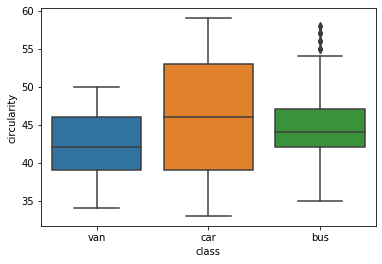

In [3857]:
#Bivariate Analysis-circularity vs class
sns.boxplot(vehicles['class'],vehicles['circularity'])
#Inference: From below graph, it is evident that circularity varies for each class. 
#Also car has wide range of data spread w.r.t circularity and outliers are observed for bus w.r.t this variable

In [3858]:
#Analyzing the variable-distance_circularity
#From the previous analysis, we could see the presence of null/NAN values in distance_circularity
#Let's replace null values and NAN values, else we will not be able to visualize this numeric variables

In [3859]:
vehicles['distance_circularity'].unique()
#Inference, we could see presence of nan values.  Before replacing the 'nan' values
#Let's check if 'circularity' variable has any outliers as this will impact the replacement value of nan

array([ 83.,  84., 106.,  82.,  70.,  73.,  66.,  62.,  98.,  74.,  85.,
        79., 103.,  51.,  77., 100.,  75.,  53.,  64., 105.,  80.,  54.,
        63., 107.,  nan,  72.,  86.,  68., 104.,  87.,  76.,  81.,  71.,
       101.,  96.,  78., 108.,  91.,  89.,  94.,  92.,  60.,  57.,  65.,
        50.,  88., 109.,  95.,  90.,  58.,  69.,  47.,  40.,  59., 110.,
        93., 102., 112.,  61.,  42.,  49.,  44.,  52.,  55.])

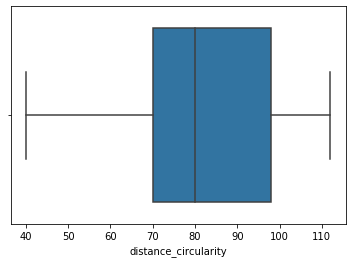

In [3860]:
sns.boxplot(vehicles['distance_circularity'])
#Inference: No outliers present, so we can directly replace Nan values with median

In [3861]:
vehicles['distance_circularity'].fillna((vehicles['distance_circularity'].median()), inplace=True)

In [3862]:
vehicles['distance_circularity'].unique()
#From below data, it is evident that nan values are replaced successfully

array([ 83.,  84., 106.,  82.,  70.,  73.,  66.,  62.,  98.,  74.,  85.,
        79., 103.,  51.,  77., 100.,  75.,  53.,  64., 105.,  80.,  54.,
        63., 107.,  72.,  86.,  68., 104.,  87.,  76.,  81.,  71., 101.,
        96.,  78., 108.,  91.,  89.,  94.,  92.,  60.,  57.,  65.,  50.,
        88., 109.,  95.,  90.,  58.,  69.,  47.,  40.,  59., 110.,  93.,
       102., 112.,  61.,  42.,  49.,  44.,  52.,  55.])

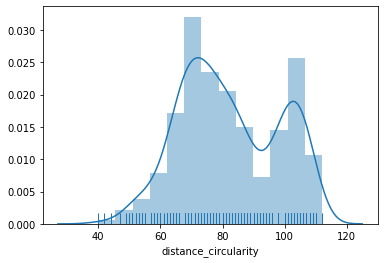

In [3863]:
sns.distplot(vehicles['distance_circularity'],rug=True)
#Inference: Data has multiple modes and slightly left tailed but no outliers present

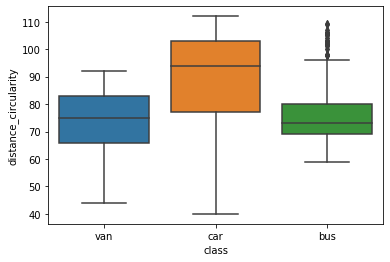

In [3864]:
#Bivariate Analysis-distance_circularity vs class
sns.boxplot(vehicles['class'],vehicles['distance_circularity'])
#Inference: From below graph, it is evident that distance_circularity varies for each class. 
#Also car has higher and wide range of data spread w.r.t distance_circularity 
#and outliers are observed for bus w.r.t this variable

In [3865]:
#Analyzing variable-'radius_ratio'
#From previous analysis, we could see presence of nan values.Lets reconfirm and treat this in below steps

In [3866]:
vehicles['radius_ratio'].unique()
#Inference, we could see presence of nan values.  Before replacing the 'nan' values
#Let's check if 'radius_ratio' variable has any outliers as this will impact the replacement value of nan

array([178., 141., 209., 159., 205., 172., 173., 157., 140.,  nan, 143.,
       136., 171., 144., 203., 201., 109., 197., 186., 215., 153., 121.,
       148., 219., 154., 119., 193., 129., 160., 151., 222., 177., 118.,
       306., 176., 169., 214., 105., 137., 183., 220., 145., 133., 122.,
       147., 115., 174., 228., 175., 185., 195., 221., 212., 135., 120.,
       156., 125., 164., 161., 227., 191., 111., 170., 113., 127., 188.,
       180., 116., 158., 162., 211., 152., 124., 252., 150., 130., 198.,
       202., 199., 128., 142., 163., 155., 184., 165., 322., 194., 218.,
       216., 223., 149., 131., 139., 179., 166., 187., 167., 231., 168.,
       126., 206., 210., 110., 189., 134., 132., 230., 196., 208., 138.,
       200., 225., 246., 207., 192., 117., 123., 146., 190., 182., 204.,
       224., 333., 213., 226., 238., 181., 114., 104., 112., 234., 235.,
       250., 232., 217.])

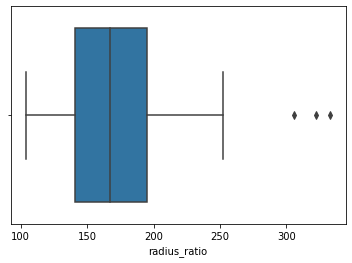

In [3867]:
sns.boxplot(vehicles['radius_ratio'])
#Boxplot shows the presence of outliers for radius_ratio (values>250 can be considered as outliers in below graph)
#So we should replace outlier values with median first and then replace nan with median

In [3868]:
vehicles[vehicles['radius_ratio']>250]. describe().transpose()
#Inference: There are just 4 records which has outliers for radius_ratio variable. Lets replace it with median

,count,mean,std,min,25%,50%,75%,max
compactness,4.0,88.75,4.991660,82.0,87.25,89.5,91.00,94.0
circularity,4.0,46.75,1.258306,45.0,46.50,47.0,47.25,48.0
distance_circularity,4.0,80.00,9.416298,66.0,78.75,84.0,85.25,86.0
radius_ratio,4.0,303.25,35.920050,252.0,292.50,314.0,324.75,333.0
pr.axis_aspect_ratio,4.0,130.75,5.852350,126.0,126.00,129.5,134.25,138.0
max.length_aspect_ratio,4.0,49.50,1.732051,48.0,48.75,49.0,49.75,52.0
scatter_ratio,4.0,153.50,4.203173,148.0,151.75,154.0,155.75,158.0
elongatedness,4.0,43.75,0.957427,43.0,43.00,43.5,44.25,45.0
pr.axis_rectangularity,4.0,19.25,0.500000,19.0,19.00,19.0,19.25,20.0
max.length_rectangularity,4.0,154.50,7.852813,144.0,152.25,155.5,157.75,163.0


In [3869]:
vehicles.radius_ratio.median()

167.0

In [3870]:
#Replacing outliers with median value
vehicles["radius_ratio"]=np.where(vehicles["radius_ratio"]>250, 167.0,vehicles["radius_ratio"])

In [3871]:
#Now lets replace na values with new median
vehicles["radius_ratio"].fillna((vehicles["radius_ratio"].median()), inplace=True)

In [3872]:
vehicles["radius_ratio"].unique()
#Inference: nan is replaced with median and hence 'nan' it is not displayed as one of the unique value

array([178., 141., 209., 159., 205., 172., 173., 157., 140., 167., 143.,
       136., 171., 144., 203., 201., 109., 197., 186., 215., 153., 121.,
       148., 219., 154., 119., 193., 129., 160., 151., 222., 177., 118.,
       176., 169., 214., 105., 137., 183., 220., 145., 133., 122., 147.,
       115., 174., 228., 175., 185., 195., 221., 212., 135., 120., 156.,
       125., 164., 161., 227., 191., 111., 170., 113., 127., 188., 180.,
       116., 158., 162., 211., 152., 124., 150., 130., 198., 202., 199.,
       128., 142., 163., 155., 184., 165., 194., 218., 216., 223., 149.,
       131., 139., 179., 166., 187., 231., 168., 126., 206., 210., 110.,
       189., 134., 132., 230., 196., 208., 138., 200., 225., 246., 207.,
       192., 117., 123., 146., 190., 182., 204., 224., 213., 226., 238.,
       181., 114., 104., 112., 234., 235., 250., 232., 217.])

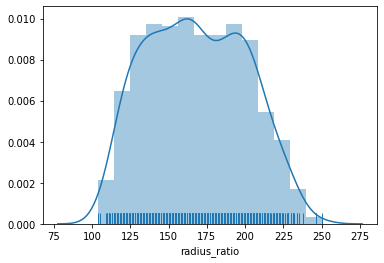

In [3873]:
sns.distplot(vehicles['radius_ratio'],rug=True)
#Inference: From the graph below, we can conclude that radius_ratio is symmetrically distributed 
#across the data set and concentration is found between values: 112-240

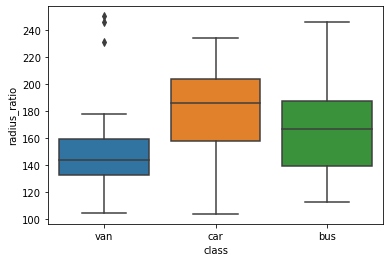

In [3874]:
#Bivariate Analysis-radius_ratio vs class
sns.boxplot(vehicles['class'],vehicles['radius_ratio'])
#Inference: From below graph, it is evident that radius_ratio is on lower range for each class. 
#Also car has slightly higher range w.r.t radius_ratio
#and outliers are observed for van w.r.t this variable

In [3875]:
#Moving forward with variable-'pr.axis_aspect_ratio'
#This has nan values and hence needs to be treated

In [3876]:
vehicles["pr.axis_aspect_ratio"].unique()
#Inference, we could see presence of nan values.  Before replacing the 'nan' values

array([ 72.,  57.,  66.,  63., 103.,  50.,  65.,  61.,  62.,  55.,  68.,
        58.,  71.,  52.,  69.,  nan,  64.,  59.,  67., 126.,  54.,  73.,
        51.,  70.,  53.,  56.,  74.,  60.,  76.,  75.,  49., 133.,  47.,
       102., 138.,  48.,  97., 105.])

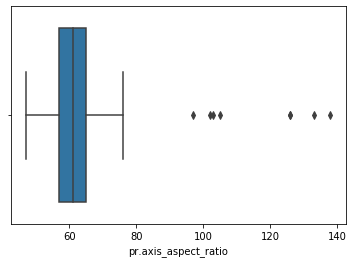

In [3877]:
#Let's check if 'radius_ratio' variable has any outliers as this will impact the replacement value of nan
sns.boxplot(vehicles['pr.axis_aspect_ratio'])
#Boxplot shows the presence of outliers for pr.axis_aspect_ratio (values>78 can be considered as outliers in below graph)
#So we should replace outlier values with median first and then replace nan with median

In [3878]:
vehicles["pr.axis_aspect_ratio"].median()

61.0

In [3879]:
#Replacing outliers with median value
vehicles["pr.axis_aspect_ratio"]=np.where(vehicles["pr.axis_aspect_ratio"]>78, 61.0,vehicles["pr.axis_aspect_ratio"])

In [3880]:
#Now lets replace na values with new median
vehicles["pr.axis_aspect_ratio"].fillna((vehicles["pr.axis_aspect_ratio"].median()), inplace=True)

In [3881]:
vehicles["pr.axis_aspect_ratio"].unique()
#Inference: nan is replaced with median and hence 'nan' it is not displayed as one of the unique value

array([72., 57., 66., 63., 61., 50., 65., 62., 55., 68., 58., 71., 52.,
       69., 64., 59., 67., 54., 73., 51., 70., 53., 56., 74., 60., 76.,
       75., 49., 47., 48.])

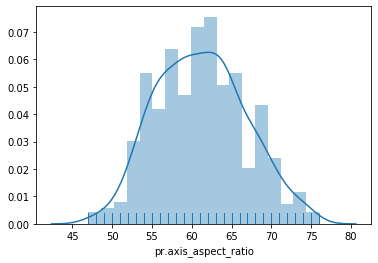

In [3882]:
sns.distplot(vehicles['pr.axis_aspect_ratio'],rug=True)
#Variable 'pr.axis_aspect_ratio' is symmetrically distributed across the data set, has multiple modes
#concentration can be seen between range of 47-76

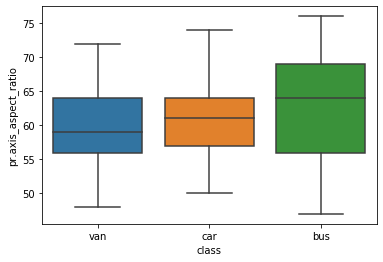

In [3883]:
#Bivariate Analysis-pr.axis_aspect_ratio vs class
sns.boxplot(vehicles['class'],vehicles['pr.axis_aspect_ratio'])
#Inference: From below graph, it is evident that pr.axis_aspect_ratio is on lower range for each class. 
#Also bus has slightly wide spread range w.r.t pr.axis_aspect_ratio
#and outliers are observed for van and bus w.r.t this variable

In [3884]:
#Analyzing variable-'max.length_aspect_ratio' in below steps.
#From previous anaylysis we could see that no nan values present in this variable. Lets reconfirm it

In [3885]:
vehicles['max.length_aspect_ratio'].unique()
#Confirmed that no nan values present here

array([10,  9, 52,  6,  7, 11,  5,  8, 49, 12, 22, 48,  4, 13,  3, 43, 25,
       46, 19,  2, 55])

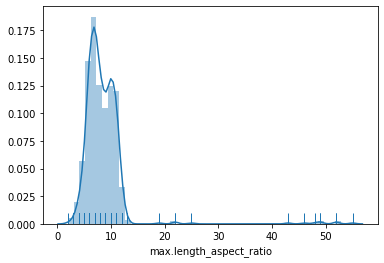

In [3886]:
sns.distplot(vehicles['max.length_aspect_ratio'],rug=True)
#Inference: Data is highly right skewed, the presence of outliers

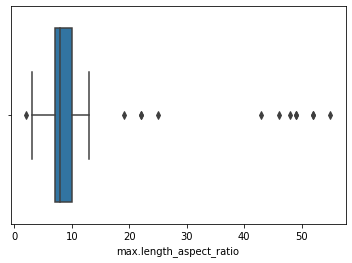

In [3887]:
#Let's reconfirm our understanding
sns.boxplot(vehicles['max.length_aspect_ratio'])
#So the presence of outliers is confirmed. max.length_aspect_ratio> 15 can be treated as outliers. Lets replace it with median

In [3888]:
vehicles['max.length_aspect_ratio'].median()

8.0

In [3889]:
vehicles["max.length_aspect_ratio"]=np.where(vehicles["max.length_aspect_ratio"]>15, 8,vehicles['max.length_aspect_ratio'])

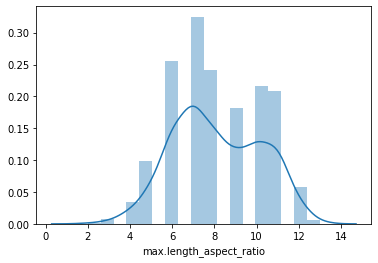

In [3890]:
sns.distplot(vehicles['max.length_aspect_ratio'])
#Reconfirming that outliers are replaced with median value

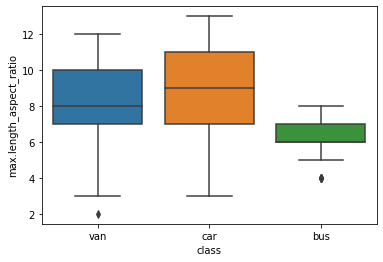

In [3891]:
#Bivariate Analysis-max.length_aspect_ratio vs class
sns.boxplot(vehicles['class'],vehicles['max.length_aspect_ratio'])
#Inference: From below graph, it is evident that max.length_aspect_ratio is on lower range for each class. 
#Also bus has narrow spread range w.r.t max.length_aspect_ratio
#and outliers are observed for van and bus w.r.t this variable

In [3892]:
#Analysis of variable-scatter_ratio
#From previous analysis, we sensed presence of nan values

In [3893]:
#Lets reconfirm our understanding
vehicles['scatter_ratio'].unique()
#Yes, nan is one of the unique value present in the data set.

array([162., 149., 207., 144., 255., 153., 137., 122., 183., 133., 123.,
       152., 174., 204., 118., 177., 216., 208., 154., 150., 143., 147.,
       128., 218., 192., 146., 155., 140., 142., 164., 157., 151., 205.,
       119., 158., 213., 159., 130., 148., 156., 163., 210., 257., 185.,
       209., 193., 184., 225., 190., 215., 224., 176., 126., 195., 172.,
       127., 261., 171., 125., 169., 197., 145., 214., 201., 114., 194.,
       220., 221., 173., 134., 160., 121., 199., 186., 161., 222., 136.,
       187., 250., 202., 166., 132., 211., 247., 116., 203., 181., 240.,
       219., 212., 138., 131., 117., 112., 165.,  nan, 226., 129., 175.,
       135., 217., 200., 241., 198., 120., 260., 188., 170., 234., 236.,
       168., 167., 227., 139., 256., 206., 141., 238., 178., 223., 252.,
       239., 115., 191., 179., 251., 262., 196., 180., 189., 237., 265.])

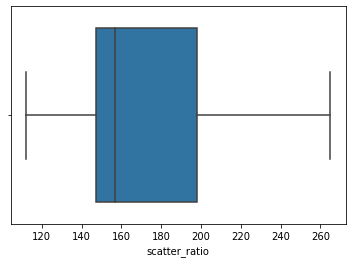

In [3894]:
#Before replacing nan value, let us also check that if outliers are present
sns.boxplot(vehicles['scatter_ratio'])
#No outliers are present. We can replace nan values with median

In [3895]:
#Replacing nan with median
vehicles["scatter_ratio"].fillna((vehicles["scatter_ratio"].median()), inplace=True)

In [3896]:
vehicles["scatter_ratio"].unique()
#Confirmed that replacement is successful

array([162., 149., 207., 144., 255., 153., 137., 122., 183., 133., 123.,
       152., 174., 204., 118., 177., 216., 208., 154., 150., 143., 147.,
       128., 218., 192., 146., 155., 140., 142., 164., 157., 151., 205.,
       119., 158., 213., 159., 130., 148., 156., 163., 210., 257., 185.,
       209., 193., 184., 225., 190., 215., 224., 176., 126., 195., 172.,
       127., 261., 171., 125., 169., 197., 145., 214., 201., 114., 194.,
       220., 221., 173., 134., 160., 121., 199., 186., 161., 222., 136.,
       187., 250., 202., 166., 132., 211., 247., 116., 203., 181., 240.,
       219., 212., 138., 131., 117., 112., 165., 226., 129., 175., 135.,
       217., 200., 241., 198., 120., 260., 188., 170., 234., 236., 168.,
       167., 227., 139., 256., 206., 141., 238., 178., 223., 252., 239.,
       115., 191., 179., 251., 262., 196., 180., 189., 237., 265.])

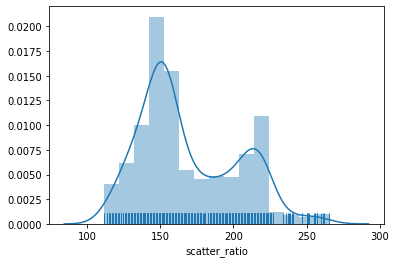

In [3897]:
sns.distplot(vehicles['scatter_ratio'],rug=True)
#Inference: scatter_ratio has multiple modes and 
#concentration can be found between value ranges 110-240 approximately

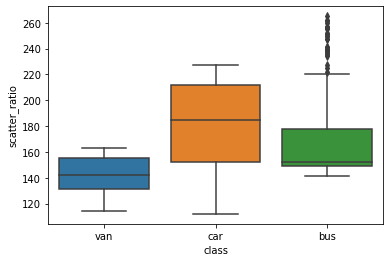

In [3898]:
#Bivariate Analysis-scatter_ratio vs class
sns.boxplot(vehicles['class'],vehicles['scatter_ratio'])
#Inference: From below graph, it is evident that scatter_ratio is varies for each class. 
#Car has wide spread range w.r.t scatter_ratio
#and outliers are observed for bus w.r.t this variable. Bus has right skewed distribution w.r.t scatter_ratio

In [3899]:
#Analysing the variable:elongatedness
#Previous anaysis indicated presence of null values
vehicles['elongatedness'].unique()
#From below data, it is confirmed that nan is one of the unique value present in the data set under column 'elongatedness'

array([42., 45., 32., 46., 26., 48., 54., 36., 50., 43., 44., 37., 57.,
       31., 55., 53., 33., 47., 40., 51., 34., 52., 35., 30., 38., 56.,
       39., 58., 59., 49., 27., 41., nan, 61., 28., 29.])

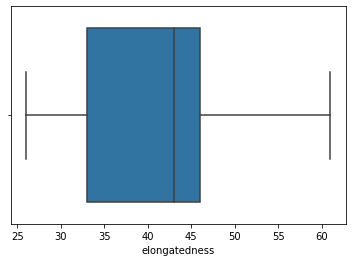

In [3900]:
#Before replacing nan values, we need to check if outliers are present
sns.boxplot(vehicles['elongatedness'])
#No outliers are present

In [3901]:
#Replacing nan with median
vehicles["elongatedness"].fillna((vehicles["elongatedness"].median()), inplace=True)

In [3902]:
vehicles["elongatedness"].unique()
#nan value is replaced successfully

array([42., 45., 32., 46., 26., 48., 54., 36., 50., 43., 44., 37., 57.,
       31., 55., 53., 33., 47., 40., 51., 34., 52., 35., 30., 38., 56.,
       39., 58., 59., 49., 27., 41., 61., 28., 29.])

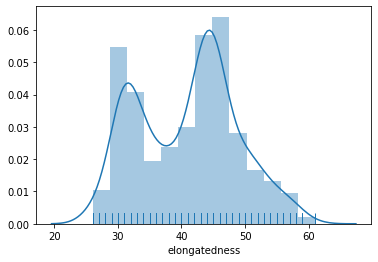

In [3903]:
sns.distplot(vehicles['elongatedness'],rug=True)
#Inference: elongatedness is spread across data set in multiple modes. 
#concentration exists between range of value 25-60

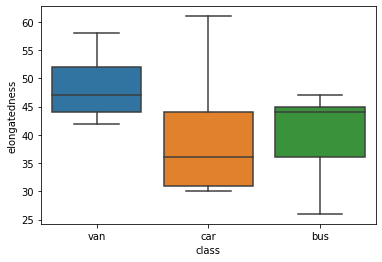

In [3904]:
#Bivariate Analysis-elongatedness vs class
sns.boxplot(vehicles['class'],vehicles['elongatedness'])
#Inference: From below graph, it is evident that elongatedness varies for each class. 
#Car has wide spread range w.r.t elongatedness
#Bus has left skewed distribution w.r.t elongatedness

In [3905]:
#Analysing the variable-pr.axis_rectangularity
#Let's reconfirm if this variable has nan values
vehicles['pr.axis_rectangularity'].unique()
#Shows the presence of nan value

array([20., 19., 23., 28., 18., 17., 22., 21., 24., 25., nan, 27., 26.,
       29.])

/Users/chai3/opt/anaconda3/lib/python3.7/site-packages/IPython/core/displayhook.py:276: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


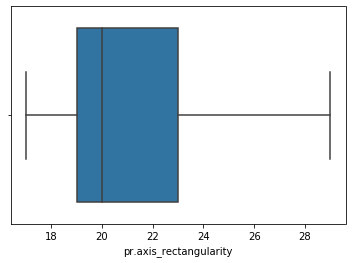

In [3906]:
#Checking if it has outliers
sns.boxplot(vehicles['pr.axis_rectangularity'])
#No outliers present

In [3907]:
#Replacing nan with median
vehicles["pr.axis_rectangularity"].fillna((vehicles["pr.axis_rectangularity"].median()), inplace=True)

In [3908]:
vehicles["pr.axis_rectangularity"].unique()
#Replacement is successful

array([20., 19., 23., 28., 18., 17., 22., 21., 24., 25., 27., 26., 29.])

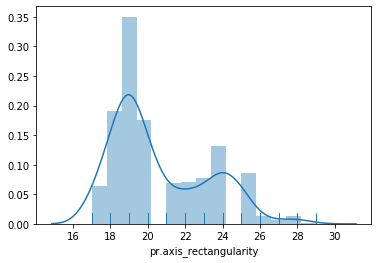

In [3909]:
sns.distplot(vehicles['pr.axis_rectangularity'],rug=True)
#Inference: Variable is widespread and has multiple modes. 
#Also we can see discontinuity between values 20-21 and 24-25

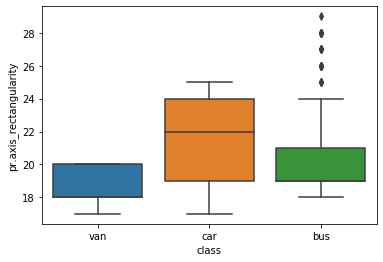

In [3910]:
#Bivariate Analysis-pr.axis_rectangularity vs class
sns.boxplot(vehicles['class'],vehicles['pr.axis_rectangularity'])
#Inference: From below graph, it is evident that pr.axis_rectangularity varies for each class. 
#Car has wide spread range w.r.t pr.axis_rectangularity
#Bus has outliers w.r.t pr.axis_rectangularity

In [3911]:
#Let us analyze the variable-max.length_rectangularity if nan values and outliers present
vehicles['max.length_rectangularity'].unique()
#No nan values are present

array([159, 143, 158, 144, 169, 146, 127, 130, 118, 148, 154, 166, 129,
       139, 173, 145, 125, 142, 136, 165, 167, 151, 128, 150, 147, 156,
       171, 162, 134, 160, 141, 163, 133, 168, 135, 161, 137, 178, 175,
       186, 132, 138, 152, 153, 122, 157, 140, 174, 124, 164, 172, 170,
       131, 123, 149, 126, 155, 176, 180, 119, 177, 121, 182, 179, 188,
       120])

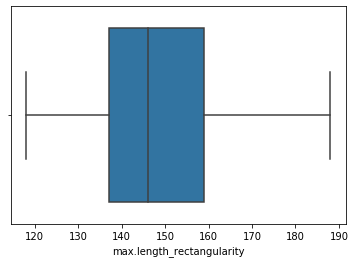

In [3912]:
#Checking for outliers
sns.boxplot(vehicles['max.length_rectangularity'])
#No outliers present

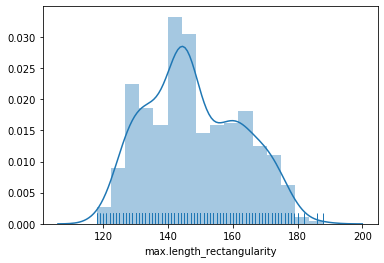

In [3913]:
sns.distplot(vehicles['max.length_rectangularity'],rug=True)
#Data is almost symmetrically distributed across max.length_rectangularity and 
#concentration is found between value range 118-180 approximately

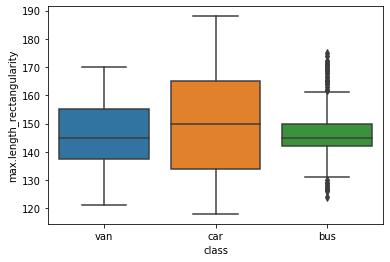

In [3914]:
#Bivariate Analysis-max.length_rectangularity vs class
sns.boxplot(vehicles['class'],vehicles['max.length_rectangularity'])
#Inference: From below graph, it is evident that max.length_rectangularity falls somewhat in same range for each class 
#Car has wide spread range w.r.t max.length_rectangularity
#Bus has narrow spread and outliers w.r.t max.length_rectangularity

In [3915]:
#Analysis of variable-scaled_variance
#Previous analysis indicated that nan values are present
vehicles['scaled_variance'].unique()
#nan is shwon as one of the unique value in data set

array([176., 170., 223., 160., 241., 280., 162., 141., 202., 153., 148.,
       180., 173., 196., 227., 137., 225., 175., 169., 164., 221., 143.,
       229., 217., 168., 165., 232., 186., 174., 272., 235., 135., 178.,
       191., 159., 172., 184., 181., 236., 275., 154., 222., 214., 145.,
       203., 231., 208., 226., 210., 197., 171., 155., 278., 189., 142.,
       218., 179., 166., 237.,  nan, 212., 177., 167., 132., 151., 216.,
       219., 157., 224., 188., 161., 207., 156., 152., 220., 266., 228.,
       185., 209., 204., 182., 200., 258., 146., 183., 163., 238., 194.,
       134., 206., 136., 130., 190., 158., 147., 140., 265., 211., 138.,
       247., 288., 234., 243., 256., 195., 213., 187., 205., 262., 320.,
       285., 215., 150., 139., 267., 149., 193., 230., 254., 269., 264.,
       199., 192., 144., 131., 246., 287., 240., 263.])

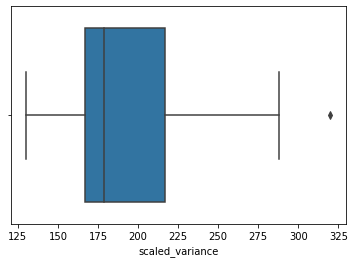

In [3916]:
#Checking for outliers
sns.boxplot(vehicles['scaled_variance'])

In [3917]:
#Replacing outliers with median
vehicles['scaled_variance'].median()

179.0

In [3918]:
vehicles["scaled_variance"]=np.where(vehicles["scaled_variance"]>290, 179,vehicles["scaled_variance"])

In [3919]:
#Now lets replace na values with new median
vehicles["scaled_variance"].fillna((vehicles["scaled_variance"].median()), inplace=True)

In [3920]:
vehicles["scaled_variance"].unique()
#Replacement of nan is successful

array([176., 170., 223., 160., 241., 280., 162., 141., 202., 153., 148.,
       180., 173., 196., 227., 137., 225., 175., 169., 164., 221., 143.,
       229., 217., 168., 165., 232., 186., 174., 272., 235., 135., 178.,
       191., 159., 172., 184., 181., 236., 275., 154., 222., 214., 145.,
       203., 231., 208., 226., 210., 197., 171., 155., 278., 189., 142.,
       218., 179., 166., 237., 212., 177., 167., 132., 151., 216., 219.,
       157., 224., 188., 161., 207., 156., 152., 220., 266., 228., 185.,
       209., 204., 182., 200., 258., 146., 183., 163., 238., 194., 134.,
       206., 136., 130., 190., 158., 147., 140., 265., 211., 138., 247.,
       288., 234., 243., 256., 195., 213., 187., 205., 262., 285., 215.,
       150., 139., 267., 149., 193., 230., 254., 269., 264., 199., 192.,
       144., 131., 246., 287., 240., 263.])

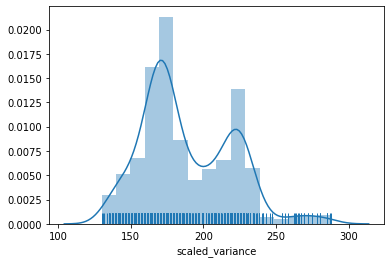

In [3921]:
sns.distplot(vehicles['scaled_variance'],rug=True)
#Variable has multiple modes and concetrated between value range 135-280 approximately

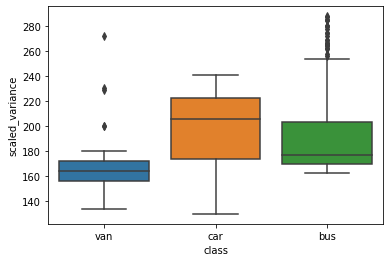

In [3922]:
#Bivariate Analysis-scaled_variance vs class
sns.boxplot(vehicles['class'],vehicles['scaled_variance'])
#Inference: From below graph, it is evident that scaled_variance varies for each class, van being lowest one
#Car has wide spread range w.r.t scaled_variance
#Bus and van has outliers w.r.t scaled_variance, bus has right skewed distribution

In [3923]:
#Analysis of variable-scaled_variance.1
#Previous analysis indicated that nan values are present
vehicles['scaled_variance.1'].unique()
#nan is shwon as one of the unique value in data set

array([ 379.,  330.,  635.,  309.,  325.,  957.,  361.,  281.,  223.,
        505.,  266.,  224.,  349.,  345.,  465.,  624.,  206.,  485.,
        686.,  651.,  354.,  221.,  344.,  307.,  623.,  324.,  238.,
        696.,  570.,  314.,  356.,  293.,  304.,  641.,  402.,  363.,
        340.,  346.,  691.,  336.,  628.,  207.,  366.,  405.,  675.,
        371.,  253.,  317.,  352.,  404.,  299.,  355.,  661.,  341.,
        956.,  265.,  512.,  653.,  241.,  567.,  247.,  269.,  333.,
        523.,  323.,  748.,  305.,  558.,  683.,  732.,  466.,  227.,
        338.,  571.,  445.,  666.,  328.,  343.,  671.,  242.,  311.,
        342.,  998.,  209.,  446.,  229.,  703.,  430.,  583.,  312.,
        308.,  337.,  602.,  321.,  326.,  347.,  246.,  194.,  576.,
        711.,  575.,  331.,  329.,  524.,  357.,  315.,  192.,  351.,
        611.,  712.,  463.,  370.,  319.,  216.,  365.,  605.,  578.,
        511.,  261.,  669.,  364.,  264.,  230.,  373.,  320.,  670.,
        406.,  728.,

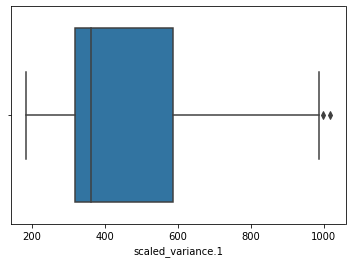

In [3924]:
#Checking for outliers
sns.boxplot(vehicles['scaled_variance.1'])
#outliers present. We can consider values >990 as outliers

In [3925]:
#Replacing outliers with median
vehicles['scaled_variance.1'].median()

363.5

In [3926]:
vehicles["scaled_variance.1"]=np.where(vehicles["scaled_variance.1"]>990, 363.5,vehicles["scaled_variance.1"])

In [3927]:
#Now lets replace na values with new median
vehicles["scaled_variance.1"].fillna((vehicles["scaled_variance.1"].median()), inplace=True)

In [3928]:
vehicles["scaled_variance.1"].unique()
#Replacement of nan is successful

array([379.  , 330.  , 635.  , 309.  , 325.  , 957.  , 361.  , 281.  ,
       223.  , 505.  , 266.  , 224.  , 349.  , 345.  , 465.  , 624.  ,
       206.  , 485.  , 686.  , 651.  , 354.  , 221.  , 344.  , 307.  ,
       623.  , 324.  , 238.  , 696.  , 570.  , 314.  , 356.  , 293.  ,
       304.  , 641.  , 402.  , 363.  , 340.  , 346.  , 691.  , 336.  ,
       628.  , 207.  , 366.  , 405.  , 675.  , 371.  , 253.  , 317.  ,
       352.  , 404.  , 299.  , 355.  , 661.  , 341.  , 956.  , 265.  ,
       512.  , 653.  , 241.  , 567.  , 247.  , 269.  , 333.  , 523.  ,
       323.  , 748.  , 305.  , 558.  , 683.  , 732.  , 466.  , 227.  ,
       338.  , 571.  , 445.  , 666.  , 328.  , 343.  , 671.  , 242.  ,
       311.  , 342.  , 363.5 , 209.  , 446.  , 229.  , 703.  , 430.  ,
       583.  , 312.  , 308.  , 337.  , 602.  , 321.  , 326.  , 347.  ,
       246.  , 194.  , 576.  , 711.  , 575.  , 331.  , 329.  , 524.  ,
       357.  , 315.  , 192.  , 351.  , 611.  , 712.  , 463.  , 370.  ,
      

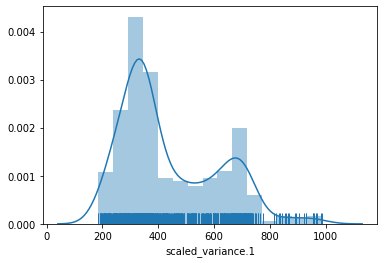

In [3929]:
sns.distplot(vehicles['scaled_variance.1'], rug=True)
#Variable has multiple modes and concetrated between value range 200-800 approximately

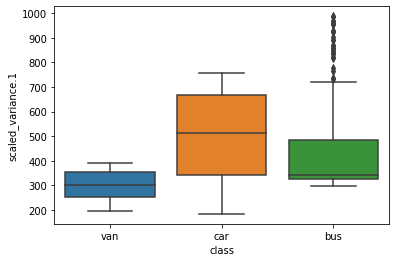

In [3930]:
#Bivariate Analysis-scaled_variance.1 vs class
sns.boxplot(vehicles['class'],vehicles['scaled_variance.1'])
#Inference: From below graph, it is evident that scaled_variance.1 varies for each class, van being lowest one
#Car has wide spread range w.r.t scaled_variance.1
#Bus and van has outliers w.r.t scaled_variance.1, bus has right skewed distribution

In [3931]:
#Variables-scaled_variance and scaled_variance.1 displays almost similar relationship with taregt variable 'class'. 
#I think once of them can be dropped

In [3932]:
#Analyzing variable-scaled_radius_of_gyration
#This variable showed presence of nan values previously

In [3933]:
vehicles["scaled_radius_of_gyration"].unique()
#Inference, we could see presence of nan values.  Before replacing the 'nan' values
#Let's check if 'scaled_radius_of_gyration' variable has any outliers 
#as this will impact the replacement value of nan


array([184., 158., 220., 127., 188., 264., 172., 164., 112., 152., 118.,
       192., 161., 206., 246., 125., 151., 223., 133., 177., 141., 224.,
       174., 139., 216., 163., 120., 204., 130., 200., 218., 186., 202.,
       232., 189., 156., 179., 146., 245., 165., 230., 119., 176., 212.,
       142., 185., 159., 183., 171., 209., 221., 147., 210., 173., 214.,
       116., 144., 148., 257., 162., 129., 132., 229., 155., 234., 170.,
       201., 150., 137., 167., 143., 187., 136., 138., 194., 153., 157.,
       198., 131., 168., 134., 145., 115., 178., 199., 195., 154., 149.,
       239., 140., 180., 217., 124., 190., 242., 169., 135., 166., 238.,
       121., 128., 191., 123., 219., 181.,  nan, 213., 175., 197., 211.,
       126., 249., 203., 205., 160., 222., 247., 226., 261., 231., 236.,
       253., 235., 182., 262., 193., 117., 250., 196., 243., 113., 228.,
       240., 241., 244., 109., 207., 268., 260., 215., 208., 237., 255.,
       114.])

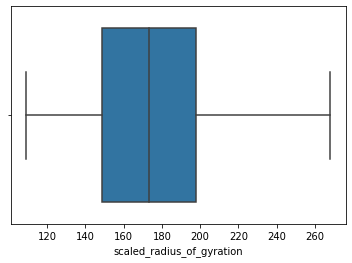

In [3934]:
sns.boxplot(vehicles['scaled_radius_of_gyration'])
#Boxplot does not show any presence of outliers for scaled_radius_of_gyration
#So nan value can be replaced with median

In [3935]:
#Now lets replace na values with median
vehicles["scaled_radius_of_gyration"].fillna((vehicles["scaled_radius_of_gyration"].median()), inplace=True)

In [3936]:
vehicles["scaled_radius_of_gyration"].unique()
#Inference: nan is replaced with median and hence 'nan' it is not displayed as one of the unique value

array([184. , 158. , 220. , 127. , 188. , 264. , 172. , 164. , 112. ,
       152. , 118. , 192. , 161. , 206. , 246. , 125. , 151. , 223. ,
       133. , 177. , 141. , 224. , 174. , 139. , 216. , 163. , 120. ,
       204. , 130. , 200. , 218. , 186. , 202. , 232. , 189. , 156. ,
       179. , 146. , 245. , 165. , 230. , 119. , 176. , 212. , 142. ,
       185. , 159. , 183. , 171. , 209. , 221. , 147. , 210. , 173. ,
       214. , 116. , 144. , 148. , 257. , 162. , 129. , 132. , 229. ,
       155. , 234. , 170. , 201. , 150. , 137. , 167. , 143. , 187. ,
       136. , 138. , 194. , 153. , 157. , 198. , 131. , 168. , 134. ,
       145. , 115. , 178. , 199. , 195. , 154. , 149. , 239. , 140. ,
       180. , 217. , 124. , 190. , 242. , 169. , 135. , 166. , 238. ,
       121. , 128. , 191. , 123. , 219. , 181. , 173.5, 213. , 175. ,
       197. , 211. , 126. , 249. , 203. , 205. , 160. , 222. , 247. ,
       226. , 261. , 231. , 236. , 253. , 235. , 182. , 262. , 193. ,
       117. , 250. ,

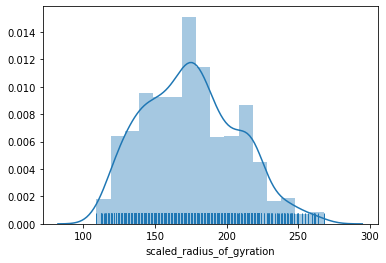

In [3937]:
sns.distplot(vehicles['scaled_radius_of_gyration'], rug=True)
#"scaled_radius_of_gyration" variable has almost symmetrical distribution across the data set
#Data concentration can be seen between value ranges-115-260 approximately

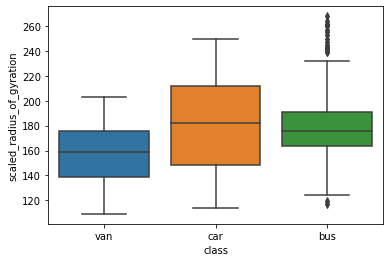

In [3938]:
#Bivariate Analysis-scaled_radius_of_gyration vs class
sns.boxplot(vehicles['class'],vehicles['scaled_radius_of_gyration'])
#Inference: From below graph, it is evident that scaled_radius_of_gyration varies for each class
#Car has wide spread range w.r.t scaled_radius_of_gyration
#Bus has outliers w.r.t scaled_radius_of_gyration

In [3939]:
#Analyzing variable-scaled_radius_of_gyration.1
#This variable showed presence of nan values previously

In [3940]:
vehicles["scaled_radius_of_gyration.1"].unique()
#Inference, we could see presence of nan values.  Before replacing the 'nan' values
#Let's check if 'scaled_radius_of_gyration.1' variable has any outliers 
#as this will impact the replacement value of nan

array([ 70.,  72.,  73.,  63., 127.,  85.,  66.,  67.,  64.,  65.,  71.,
        74.,  80.,  75.,  82.,  68.,  69.,  76.,  83., 118.,  86.,  77.,
        88.,  62.,  79.,  78.,  nan,  81.,  87., 119.,  97.,  60.,  61.,
        89.,  90.,  84., 135.,  91.,  59.,  99.])

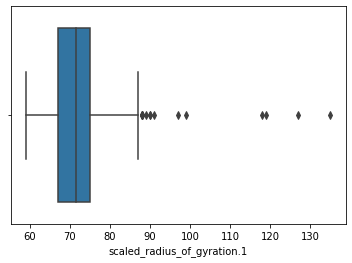

In [3941]:
sns.boxplot(vehicles['scaled_radius_of_gyration.1'])
#Boxplot does shows the presence of outliers for scaled_radius_of_gyration.1
#Values>88 can be considered as outlier

In [3942]:
vehicles["scaled_radius_of_gyration.1"].median()

71.5

In [3943]:
vehicles["scaled_radius_of_gyration.1"]=np.where(vehicles["scaled_radius_of_gyration.1"]>88, 71.5,vehicles["scaled_radius_of_gyration.1"])


In [3944]:
#Now lets replace na values with new median
vehicles["scaled_radius_of_gyration.1"].fillna((vehicles["scaled_radius_of_gyration.1"].median()), inplace=True)

In [3945]:
vehicles["scaled_radius_of_gyration.1"].unique()
#Inference: nan is replaced with median and hence 'nan' it is not displayed as one of the unique value

array([70.  , 72.  , 73.  , 63.  , 71.5 , 85.  , 66.  , 67.  , 64.  ,
       65.  , 71.  , 74.  , 80.  , 75.  , 82.  , 68.  , 69.  , 76.  ,
       83.  , 86.  , 77.  , 88.  , 62.  , 79.  , 78.  , 71.25, 81.  ,
       87.  , 60.  , 61.  , 84.  , 59.  ])

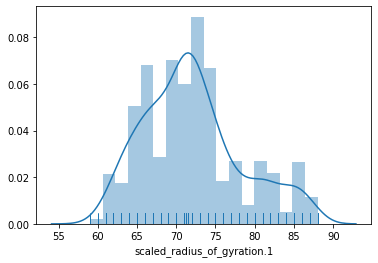

In [3946]:
sns.distplot(vehicles['scaled_radius_of_gyration.1'], rug=True)
#"scaled_radius_of_gyration.1" variable has almost symmetrical distribution across the data set
#Data concentration can be seen between value ranges-60-88 approximately

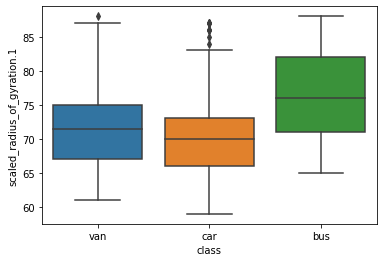

In [3947]:
#Bivariate Analysis-scaled_radius_of_gyration.1 vs class
sns.boxplot(vehicles['class'],vehicles['scaled_radius_of_gyration.1'])
#Inference: From below graph, it is evident that scaled_radius_of_gyration.1 varies for each class
#bus has wide spread range w.r.t scaled_radius_of_gyration.1
#van and car has outliers w.r.t scaled_radius_of_gyration.1

In [3948]:
#Variables-scaled_radius_of_gyration and scaled_radius_of_gyration.1 does not display similar behavious
#w.r.t target variable 'class', so think chances of dropping one of the column is less

In [3949]:
#Analyzing variable-skewness_about
#This variable showed presence of nan values previously

In [3950]:
vehicles["skewness_about"].unique()
#Inference, we could see presence of nan values.  Before replacing the 'nan' values
#Let's check if 'skewness_about' variable has any outliers 
#as this will impact the replacement value of nan

array([ 6.,  9., 14.,  5., 13.,  3.,  2.,  4.,  8.,  0.,  7.,  1., 10.,
       17., 20., 18., nan, 11., 16., 21., 12., 22., 15., 19.])

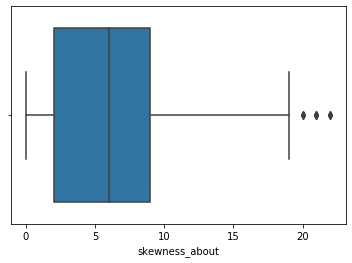

In [3951]:
sns.boxplot(vehicles['skewness_about'])
#Boxplot does shows the presence of outliers for skewness_about
#Values >19 can be considered as outlier

In [3952]:
vehicles["skewness_about"].median()

6.0

In [3953]:
vehicles["skewness_about"]=np.where(vehicles["skewness_about"]>19, 6,vehicles["skewness_about"])


In [3954]:
#Now lets replace na values with new median
vehicles["skewness_about"].fillna((vehicles["skewness_about"].median()), inplace=True)

In [3955]:
vehicles["skewness_about"].unique()
#Inference: nan is replaced with median and hence 'nan' it is not displayed as one of the unique value

array([ 6.,  9., 14.,  5., 13.,  3.,  2.,  4.,  8.,  0.,  7.,  1., 10.,
       17., 18., 11., 16., 12., 15., 19.])

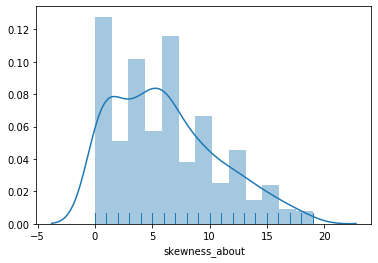

In [3956]:
sns.distplot(vehicles['skewness_about'], rug=True)
#"skewness_about" variable has slightly right skewed  distribution across the data set with multiple modes
#Data concentration can be seen between value ranges-0-19 approximately

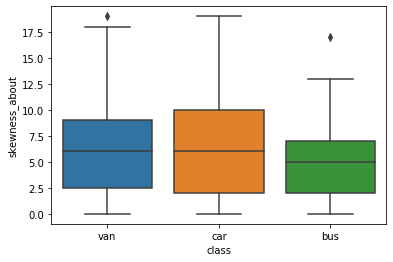

In [3957]:
#Bivariate Analysis-skewness_about vs class
sns.boxplot(vehicles['class'],vehicles['skewness_about'])
#Inference: From below graph, it is evident that skewness_about is almost overlapping for each class
#car has wide spread range w.r.t skewness_about
#van and bus has outliers w.r.t skewness_about

In [3958]:
#Analyzing variable-skewness_about.1
#This variable showed presence of nan values previously

In [3959]:
vehicles["skewness_about.1"].unique()
#Inference, we could see presence of nan values.  Before replacing the 'nan' values
#Let's check if 'skewness_about.1' variable has any outliers 
#as this will impact the replacement value of nan

array([16., 14.,  9., 10., 11.,  1.,  3., 26., 13.,  2.,  5.,  6.,  4.,
       28.,  7., 20., 38., 25., 15.,  0.,  8., 24., 21., 18., 23., 30.,
       12., 29., 27., nan, 33., 32., 41., 39., 17., 22., 19., 35., 31.,
       36., 40., 34.])

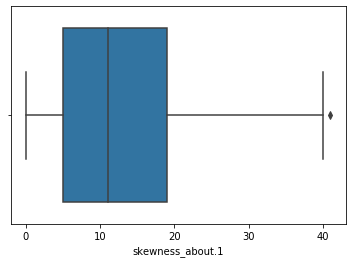

In [3960]:
sns.boxplot(vehicles['skewness_about.1'])
#Boxplot does shows the presence of outliers for skewness_about.1
#Values >40 can be considered as outlier

In [3961]:
vehicles["skewness_about.1"].median()

11.0

In [3962]:
vehicles["skewness_about.1"]=np.where(vehicles["skewness_about.1"]>40, 11,vehicles["skewness_about.1"])


In [3963]:
#Now lets replace na values with new median
vehicles["skewness_about.1"].fillna((vehicles["skewness_about.1"].median()), inplace=True)

In [3964]:
vehicles["skewness_about.1"].unique()
#Inference: nan is replaced with median and hence 'nan' it is not displayed as one of the unique value

array([16., 14.,  9., 10., 11.,  1.,  3., 26., 13.,  2.,  5.,  6.,  4.,
       28.,  7., 20., 38., 25., 15.,  0.,  8., 24., 21., 18., 23., 30.,
       12., 29., 27., 33., 32., 39., 17., 22., 19., 35., 31., 36., 40.,
       34.])

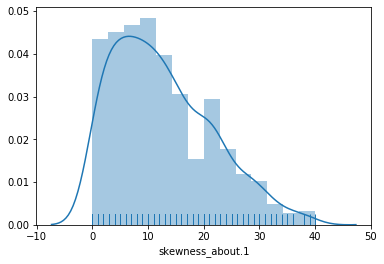

In [3965]:
sns.distplot(vehicles['skewness_about.1'], rug=True)
#"skewness_about.1" variable has slightly right skewed  distribution across the data set 
#Data concentration can be seen between value ranges-0-40 approximately

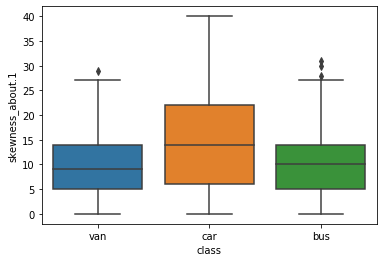

In [3966]:
#Bivariate Analysis-skewness_about.1 vs class
sns.boxplot(vehicles['class'],vehicles['skewness_about.1'])
#Inference: From below graph, it is evident that skewness_about.1 is almost overlapping for each class
#car has wide spread range w.r.t skewness_about.1
#van and bus has outliers w.r.t skewness_about.1

In [3967]:
#Analyzing variable-skewness_about.2
#This variable showed presence of nan values previously

In [3968]:
vehicles["skewness_about.2"].unique()
#Inference, we could see presence of nan values.  Before replacing the 'nan' values
#Let's check if 'skewness_about.2' variable has any outliers 
#as this will impact the replacement value of nan

array([187., 189., 188., 199., 180., 181., 200., 193., 195., 194., 196.,
       197., 186., 198., 185., 179., 192., 191., 190., 183., 184., 202.,
       201., 182., 176., 178., 203., 177.,  nan, 204., 206.])

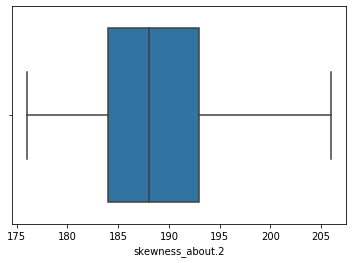

In [3969]:
sns.boxplot(vehicles['skewness_about.2'])
#Boxplot does  not show the presence of outliers for skewness_about.2

In [3970]:
#Now lets replace na values with new median
vehicles["skewness_about.2"].fillna((vehicles["skewness_about.2"].median()), inplace=True)

In [3971]:
vehicles["skewness_about.2"].unique()
#Inference: nan is replaced with median and hence 'nan' it is not displayed as one of the unique value

array([187., 189., 188., 199., 180., 181., 200., 193., 195., 194., 196.,
       197., 186., 198., 185., 179., 192., 191., 190., 183., 184., 202.,
       201., 182., 176., 178., 203., 177., 204., 206.])

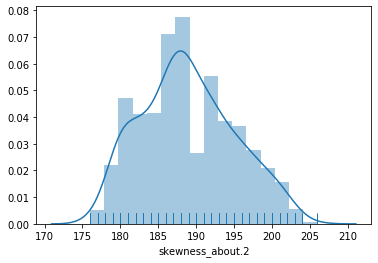

In [3972]:
sns.distplot(vehicles['skewness_about.2'], rug=True)
#"skewness_about.2" variable has slightly right skewed  distribution across the data set with multiple modes
#Data concentration can be seen between value ranges-176-204 approximately

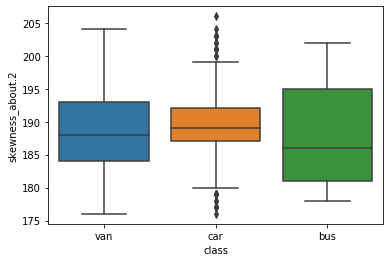

In [3973]:
#Bivariate Analysis-skewness_about.2 vs class
sns.boxplot(vehicles['class'],vehicles['skewness_about.2'])
#Inference: From below graph, it is evident that skewness_about.2 is almost overlapping for each class
#bus has wide spread range w.r.t skewness_about.2
#car has outliers w.r.t skewness_about.2

In [3974]:
#Among the variables-skewness_about,skewness_about.1,skewness_about.2, only first 2 variables shows similarity w.r.t 
#target variable 'class'. I think we can consider one of the column for analysis

In [3975]:
vehicles['hollows_ratio'].unique()
#No 'nan' values present

array([197, 199, 196, 207, 183, 204, 202, 208, 195, 194, 185, 193, 192,
       206, 201, 205, 200, 189, 182, 209, 184, 187, 188, 198, 191, 190,
       203, 186, 210, 211, 181])

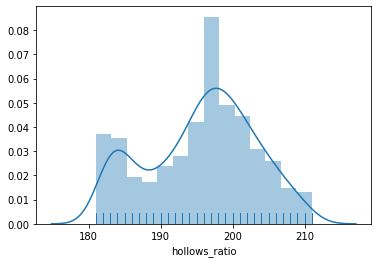

In [3976]:
sns.distplot(vehicles["hollows_ratio"],rug=True)
#Data is somewhat symmertically spread across variable hollows_ratio.
#Has multiple modes and concentration can be found between value range-181-201 approximately

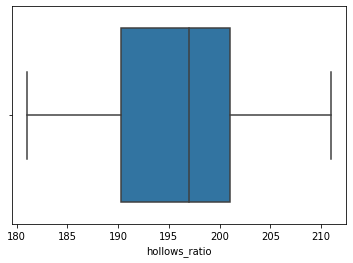

In [3977]:
sns.boxplot(vehicles["hollows_ratio"])
#No outliers found

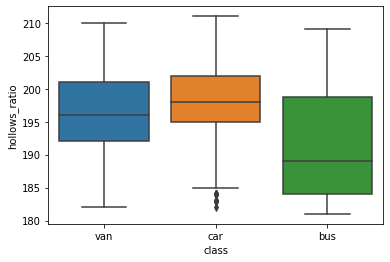

In [3978]:
#Bivariate Analysis-hollows_ratio vs class
sns.boxplot(vehicles['class'],vehicles['hollows_ratio'])
#Inference: From below graph, it is evident that hollows_ratio is almost overlapping between classes-van and car
#bus has wide spread range w.r.t hollows_ratio and slightly right skewed
#car has outliers w.r.t hollows_ratio

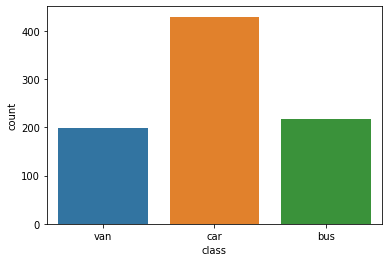

In [3979]:
#Univariate analysis of categorical variable-'class'
sns.countplot(vehicles["class"])
#From below graph we can conclude that class of type-car has highest presence in data set and 
#remainaing class types-van and bus shares equal presence in data set (second highest)

In [3980]:
#Let's print heatmap and re-confirm that all the nan/null values are replaced successfully

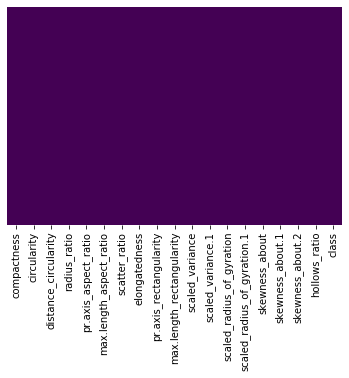

In [3981]:
sns.heatmap(vehicles.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#Inference: null values are present under columns are replaced successfully

In [3982]:
vehicles['class'].unique()
#The data set has type of vehicle already mentioned (Target variable) . 
#This is categorical variable which needs to be converted into integer form
#Also we need to drop it while performing unsupervised learning as this data already has clusters

array(['van', 'car', 'bus'], dtype=object)

In [3983]:
pd.value_counts(vehicles['class'])
#So from below data, we can see that total 846 values present and hence no missing data

car    429
bus    218
van    199
Name: class, dtype: int64

In [3984]:
#Labelling the variable based on size of the vehicle
cleanup_nums = { "class":     {"car": 1, "van": 2 ,"bus": 3}                }
#Replacing in the data set
vehicles.replace(cleanup_nums, inplace=True)
vehicles['class'].unique()
#Inference: Labelling and replacement is reflecting successfully

array([2, 1, 3])

In [3985]:
#Data clean up and analysis is completed. We are good to proceed further.
#Overall inference from the EDA is summarized below:
#Presence of nan values taken care
#Outliers treatment taken care
#Some of the variables-scaled_variance and scaled_variance.1 display similar behavious w.r.t 'class'
#Also skewness_about and skewness_about.1 display similar behavious w.r.t 'class

In [3986]:
#Split the data into train and test 
#(Suggestion: specify “random state” if you are using train_test_split from Sklearn)

In [3987]:
#Split the data into train and test 
#(Suggestion: specify “random state” if you are using train_test_split from Sklearn)

#Importing required libaries
from sklearn.model_selection import train_test_split
import os
#Drop the target 'class' from data
x=vehicles.drop('class',axis=1)
y=vehicles['class']
# Splitting the dataset into the Training set and Test set
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,test_size=0.30,random_state=0)
x_train,x_test,y_train,y_test

(     compactness  circularity  distance_circularity  radius_ratio  \
 775           97         38.0                  75.0         188.0   
 242           85         42.0                  59.0         132.0   
 301           93         43.0                  78.0         166.0   
 170          108         51.0                 103.0         197.0   
 187           98         45.0                  76.0         166.0   
 ..           ...          ...                   ...           ...   
 835          111         58.0                 105.0         183.0   
 192           93         43.0                  76.0         149.0   
 629           90         42.0                  63.0         144.0   
 559          101         56.0                 101.0         231.0   
 684           99         38.0                  74.0         184.0   
 
      pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
 775                  68.0                        6          171.0   
 242              

In [3988]:
#Do data Scaling/Normalization if required
#This is needed we have variables in different scale ex: scaled_variance.1 etc
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [3989]:
#Train a Support vector machine using the train set and get the accuracy on the test set
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(x_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(x_test, y_test)))
#Inference: We could see 98% accuracy on train set and 97% accuracy on test set using SVM

Accuracy on training set: 0.98
Accuracy on test set: 0.97


In [3990]:
#Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data

In [3991]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(x_train.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)

Covariance Matrix 
%s [[ 1.00169205  0.68000646  0.78156566  0.72984036  0.22807225  0.48553152
   0.80894497 -0.78634991  0.80872907  0.67513298  0.76343925  0.80852914
   0.58416325 -0.25182793  0.19946184  0.14713031  0.32162852  0.37577561]
 [ 0.68000646  1.00169205  0.7918571   0.63899924  0.21602145  0.5588565
   0.85087555 -0.82187596  0.8448786   0.9613981   0.80073788  0.83541333
   0.9319483   0.06198946  0.13085597 -0.03734851 -0.09146858  0.0584263 ]
 [ 0.78156566  0.7918571   1.00169205  0.80054422  0.26997793  0.66466763
   0.9068752  -0.91001885  0.89545283  0.77163057  0.86470217  0.88778588
   0.71376714 -0.23474884  0.10782172  0.24007377  0.15054941  0.33693755]
 [ 0.72984036  0.63899924  0.80054422  1.00169205  0.67128689  0.45254435
   0.78033035 -0.83550076  0.75324953  0.57554792  0.79304415  0.77367321
   0.56216077 -0.38623707  0.05880367  0.17594305  0.42728704  0.50452355]
 [ 0.22807225  0.21602145  0.26997793  0.67128689  1.00169205  0.15603032
   0.22625769

In [3992]:
print('\nEigenvalues \n%s' %e_vals)


Eigenvalues 
[9.77663713e+00 3.33869552e+00 1.24777428e+00 1.10218942e+00
 9.03091944e-01 6.36166185e-01 3.11966572e-01 2.39787146e-01
 1.23902420e-01 7.69019265e-02 7.15620369e-02 6.11113643e-02
 3.35317156e-03 3.90603167e-02 3.03961502e-02 2.73516838e-02
 1.97310009e-02 2.07785875e-02]


In [3993]:
# "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 54.22290299  72.7398798   79.66024955  85.77318076  90.78188326
  94.31016982  96.04038982  97.37029038  98.05747441  98.48398566
  98.88088096  99.21981505  99.43645025  99.6050325   99.75672963
  99.87197123  99.98140274 100.        ]


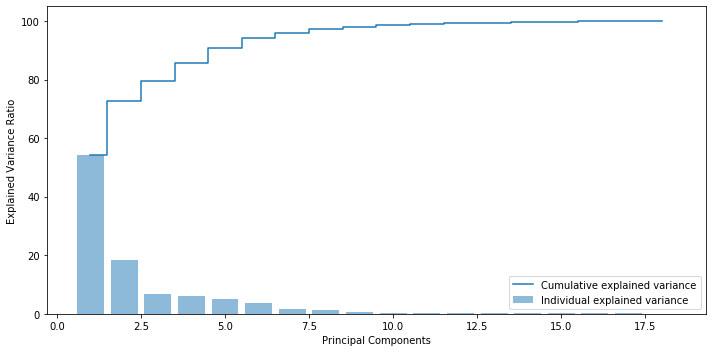

In [3994]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#Inference: From below graph we can learn that ~95% data variance can be captured 
#when we take only ~ 6 variables from the original data set

In [3995]:
#Proceeding with 6 components
pca_new = PCA(n_components=6)
#Fitting PCA into train data
pca_new.fit(x_train)
#Fitting PCA into test data
pca_new.fit(x_test)
print(pca_new.components_)
print(pca_new.explained_variance_ratio_)
Xpca_train_new = pca_new.transform(x_train)
Xpca_test_new = pca_new.transform(x_test)

[[-0.27486377 -0.28862844 -0.303811   -0.2679999  -0.07367439 -0.20542201
  -0.31012847  0.30888772 -0.30776124 -0.28208938 -0.30099055 -0.30262895
  -0.2603852   0.03898709 -0.03292546 -0.07128107 -0.02230566 -0.07312317]
 [-0.07930426  0.12112866 -0.05894321 -0.20439674 -0.24064605 -0.1345645
   0.07055325 -0.01228618  0.08336366  0.10374901  0.07334559  0.06469688
   0.22066013  0.50831978  0.0465361  -0.11595374 -0.49280113 -0.50972265]
 [-0.10785641  0.10185303 -0.1073343   0.23726752  0.62170817 -0.21043234
  -0.04337193 -0.02816896 -0.05187363  0.03258923  0.01264508 -0.03051392
   0.16335383  0.0601597  -0.23389205 -0.61504609  0.04347226 -0.08169689]
 [ 0.15931149  0.11990208 -0.03732425 -0.08280713 -0.11229657  0.00094766
  -0.06464904  0.07236423 -0.0552066   0.11003301 -0.09535256 -0.06273043
   0.11911933 -0.08518099  0.82164658 -0.42007724  0.1593486   0.05812312]
 [ 0.19264492 -0.2441761  -0.0299199   0.12014141 -0.11276708 -0.70318025
   0.16109835 -0.14705894  0.158614

In [3996]:
print("original shape:   ", x_test.shape)
print("transformed shape:", Xpca_test_new.shape)
#Inference: From below data it is evident that dimension of the data set is reduced from 18 to 6 
#(excluding target variable-class)

original shape:    (254, 18)
transformed shape: (254, 6)


In [3997]:
#Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. 
#And the accuracy score should be on the same rows of test data that were used earlier.

In [3998]:
#Applying SVM on principal components derived above i.e., 6
clf = SVC(gamma='auto')
clf.fit(Xpca_train_new, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [3999]:
#Compare the accuracy scores and cross validation scores of Support vector machines 
#– one trained using raw data and the other using Principal Components, and mention your findings

clf = SVC(gamma='auto')
clf.fit(x_train, y_train)

print ('Before PCA score of train set: ', clf.score(x_train, y_train))

print ('Before PCA score of test set: ', clf.score(x_test, y_test))

clf.fit(Xpca_train_new, y_train)

print ('After PCA score of train set: ', clf.score(Xpca_train_new, y_train))

print ('After PCA score of test set: ', clf.score(Xpca_test_new, y_test))


Before PCA score of train set:  0.9780405405405406
Before PCA score of test set:  0.9724409448818898
After PCA score of train set:  0.9543918918918919
After PCA score of test set:  0.9251968503937008


In [3829]:
# Conclusion:
#With orignal data we could build a model which displays accuracy of ~98%(on train data) and ~97% (on test data)with 18 columns
#Post PCA analysis, we could build a model which displays accuracy of ~95% (on train data) and ~92% (on test data) with 6 columns
# So the second model seems to be cost-effective as accuracy is not dropped much where as dimension is reduced considerably
